In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
path1 = './../data/training_set_labels.csv'
path2 = './../data/training_set_features.csv'
test_path = './../data/test_set_features.csv'
df1 = pd.read_csv(path1)
df_train = pd.read_csv(path2)
df_test = pd.read_csv(test_path)
target = df1.wind_speed
df_train['wind_speed'] = target
test_df = pd.read_csv(test_path)
df_train.head()

,image_id,storm_id,relative_time,ocean,wind_speed
0,abs_000,abs,0,2,43
1,abs_001,abs,1800,2,44
2,abs_002,abs,5400,2,45
3,abs_003,abs,17999,2,52
4,abs_004,abs,19799,2,53


In [8]:
df_train['wind_speed'].describe()

count    70257.000000
mean        50.344008
std         26.795277
min         15.000000
25%         30.000000
50%         43.000000
75%         62.000000
max        185.000000
Name: wind_speed, dtype: float64

In [20]:
name_train = set(list(df_train.storm_id))
name_test = set(list(df_test.storm_id))
not_in = []
for i in name_test:
    if i in name_train:
        not_in.append(i)
print(len(not_in))
print(227+144)
print(len(name_test))

227
371
371


# Naive solution

In [69]:
result = np.random.normal(loc = 50.344008, scale = 26.795277, size = (70257,))
target = np.array(df_train.wind_speed)
RMSE = np.sqrt(np.sum((result-target)**2))
print(RMSE)

10067.975003749127


# Back to work

<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

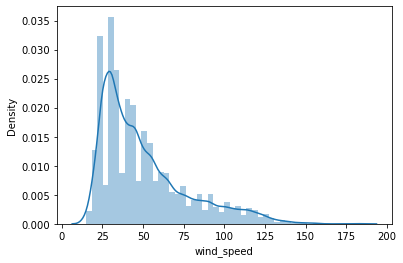

In [72]:
sns.distplot(df_train['wind_speed'])

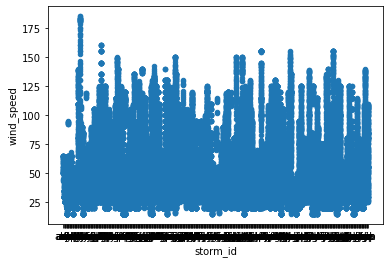

In [75]:
var = 'storm_id'
data = pd.concat([df_train['wind_speed'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='wind_speed')

In [20]:
from albumentations import CenterCrop
# from torchvision.transforms import CenterCrop
# transform = CenterCrop(128)
from PIL import Image
import cv2
from matplotlib import pyplot as plt

transform = CenterCrop(128,128)
path = '/home/giang/Desktop/Wind_data/train/abs_000.jpg'
# image = Image.open(path)
image = cv2.imread(path)
print(image.shape)
image = transform(image=image)['image']
print(image.shape)
# plt.imshow(image, cmap = 'gray')
# plt.subplot(image, cmap = 'gray')

(366, 366, 3)
(128, 128, 3)


# For predict

In [31]:
import numpy as np
import pandas as pd

path = './../sub1.csv'
df = pd.read_csv(path)
wind_speed = list(df.wind_speed)
temp = [int(i[1:-1]) for i in wind_speed]
df.wind_speed = temp
df.to_csv('sub1.csv', index = False)

# Merge csv

In [35]:
import pandas as pd

df1 = pd.read_csv('./../data/training_set_features.csv')
df2 = pd.read_csv('./../data/training_set_labels.csv')

df = pd.merge(df1,df2, on = 'image_id')
df.to_csv('./../data/train.csv')

# Split data

In [46]:
# def wind_split(df):
#     return None
    
# wind_split(df)
full_metadata = df.copy()
images_per_storm = full_metadata.groupby("storm_id").size().to_frame("images_per_storm")
full_metadata = full_metadata.merge(images_per_storm, how="left", on="storm_id")
full_metadata["pct_of_storm"] = (
    full_metadata.groupby("storm_id").cumcount() / full_metadata.images_per_storm
)
train = full_metadata[np.logical_and(0.1 < full_metadata.pct_of_storm, full_metadata.pct_of_storm < 0.9)].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)
val = full_metadata[np.logical_or(full_metadata.pct_of_storm >= 0.9, full_metadata.pct_of_storm <= 0.1)].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)

print(len(val) / len(full_metadata) * 100)

20.066327910386153


In [47]:
train.to_csv('./../data/train_10first_10last.csv')
val.to_csv('./../data/val_10first_10last.csv')

# Target for anchor

In [26]:
import pandas as pd
import numpy as np

train = pd.read_csv('./../data/train_10first_10last.csv')
val = pd.read_csv('./../data/val_10first_10last.csv')

train.drop('mean', inplace = True, axis = 1)
val.drop('mean', inplace = True, axis = 1)

wind_train = np.array(train.wind_speed)
wind_val = np.array(val.wind_speed)
print(wind_train.shape, wind_val.shape)
print(train.head())

(56159,) (14098,)
   Unnamed: 0  Unnamed: 0.1 image_id storm_id  relative_time  ocean  \
0           0             6  abs_006      abs          34199      2   
1           1             7  abs_007      abs          37799      2   
2           2             8  abs_008      abs          39599      2   
3           3             9  abs_009      abs          41399      2   
4           4            10  abs_010      abs          43199      2   

   wind_speed  exp_wind  
0          63  0.224255  
1          65  0.255508  
2          65  0.255508  
3          65  0.255508  
4          65  0.255508  


In [27]:
yasuo = np.concatenate((wind_train, wind_val))
mean = np.mean(yasuo)
train['mean_wind'] = np.mean(yasuo)
val['mean_wind'] = np.mean(yasuo)
print(train.head())

   Unnamed: 0  Unnamed: 0.1 image_id storm_id  relative_time  ocean  \
0           0             6  abs_006      abs          34199      2   
1           1             7  abs_007      abs          37799      2   
2           2             8  abs_008      abs          39599      2   
3           3             9  abs_009      abs          41399      2   
4           4            10  abs_010      abs          43199      2   

   wind_speed  exp_wind  mean_wind  
0          63  0.224255  50.344008  
1          65  0.255508  50.344008  
2          65  0.255508  50.344008  
3          65  0.255508  50.344008  
4          65  0.255508  50.344008  


In [28]:
# get exponential, formula: anchor * exp(t)
train_exp_target = np.log(wind_train/mean)
val_exp_target = np.log(wind_val/mean)

train['exp_wind'] = train_exp_target
val['exp_wind'] = val_exp_target

In [29]:
train.to_csv('./../data/train_10first_10last.csv')
val.to_csv('./../data/val_10first_10last.csv')

In [17]:
np.log(np.exp(10))

10.0

# K-Nearest-Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Plot result

In [1]:
import pickle

path1 = './../plot.pkl'
# path2 = './../plot1.pkl'
with open(path1, 'rb') as f:
    data1 = pickle.load(f)
# with open(path2, 'rb') as f:
#     data2 = pickle.load(f)


In [2]:
data1['train'].extend(data2['train'])
train = data1['train']
data1['val'].extend(data2['val'])
val = data1['val']
print(len(train))
print(len(val))

31
31


In [4]:
train = data1['train']
print(train)
val = data1['val']

[33.328740363251676, 23.44023960638264, 23.453945074995904, 23.469075149052763, 23.482066996565692, 23.49260688753433, 23.500851246864283]


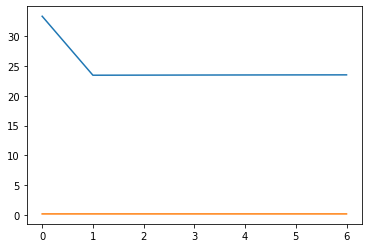

In [5]:
from matplotlib import pyplot as plt

x = range(7)
plt.plot(x,train)
plt.plot(x,val)

In [14]:
print(train)

[20.106723709539935, 20.080499730326913, 19.969507486169988, 19.919396662712096, 20.102700117501346, 20.162262190471996, 19.973293416066603, 19.95562289953232, 20.017005703665994, 19.924877193841066, 19.96908176053654, 20.125784344022925, 19.9118727423928, 19.837658435648137, 19.965400849689136, 19.872442828525198, 19.852062222090634, 19.845361615311017, 43.903474710204385, 25.21971628882668, 24.82378513162786, 23.817815845662896, 22.791993912783536, 22.19983672662215, 21.910002964193172, 21.23241101178256, 20.78900581923398, 20.649914464083587, 20.453947546265344, 20.40225264267488, 20.397677899490702]


In [13]:
import cv2
path = '/home/giang/Downloads/1.jpg'
image = cv2.imread(path)

h,w,_ = image.shape

out_path = '/home/giang/Desktop/video.mp4'
out1 = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 5, (w,h))

count = 0
while True:
    out1.write(image)
    count+=1
    if count == 125:
        break
out1.release()
        

# Divide data as Driven Benchmark

In [10]:
data_root = '/home/giang/Desktop/Wind_data/'

In [11]:
train_metadata = pd.read_csv(data_root + "training_set_features.csv")
train_labels = pd.read_csv(data_root + "training_set_labels.csv")
full_metadata = train_metadata.merge(train_labels, on="image_id")


In [12]:
prefix = data_root + 'train/'
path = []
for i in full_metadata.image_id:
    path.append(prefix + i + '.jpg')

In [13]:
full_metadata['image_path'] = path
full_metadata.head()

,image_id,storm_id,relative_time,ocean,wind_speed,image_path
0,abs_000,abs,0,2,43,/home/giang/Desktop/Wind_data/train/abs_000.jpg
1,abs_001,abs,1800,2,44,/home/giang/Desktop/Wind_data/train/abs_001.jpg
2,abs_002,abs,5400,2,45,/home/giang/Desktop/Wind_data/train/abs_002.jpg
3,abs_003,abs,17999,2,52,/home/giang/Desktop/Wind_data/train/abs_003.jpg
4,abs_004,abs,19799,2,53,/home/giang/Desktop/Wind_data/train/abs_004.jpg


In [14]:
images_per_storm = full_metadata.groupby("storm_id").size().to_frame("images_per_storm")
full_metadata = full_metadata.merge(images_per_storm, how="left", on="storm_id")
full_metadata["pct_of_storm"] = (
    full_metadata.groupby("storm_id").cumcount() / full_metadata.images_per_storm
)
train = full_metadata[full_metadata.pct_of_storm < 0.8].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)
val = full_metadata[full_metadata.pct_of_storm >= 0.8].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)

In [15]:
len(val) / len(full_metadata) * 100

19.734688358455386

In [16]:
short_train = train.sample(frac=0.1, replace=False, random_state=1)
print(short_train.shape)
short_val = val.sample(frac=0.1, replace=False, random_state=1)
print(short_val.shape)
print(type(short_val))

(5639, 6)
(1386, 6)
<class 'pandas.core.frame.DataFrame'>


In [17]:
short_train.to_csv(data_root + 'reproduce/twenty_percent_train.csv')
short_val.to_csv(data_root + 'reproduce/twenty_percent_val.csv')

In [16]:
train.to_csv(data_root + 'reproduce/train.csv')
val.to_csv(data_root + 'reproduce/val.csv')

# Divide data with strategy: first 10 percent and last 10 percent for each storm

At first, because of the wrong of the code, I think that this distribution is not good and even I still think it is not good now. However, after 4 submissions, the loss of validation is really near to public score, so I decide to keep this data distribution

In [13]:
import pandas as pd
import numpy as np

In [14]:
images_per_storm = full_metadata.groupby("storm_id").size().to_frame("images_per_storm")
full_metadata = full_metadata.merge(images_per_storm, how="left", on="storm_id")
full_metadata["pct_of_storm"] = (
    full_metadata.groupby("storm_id").cumcount() / full_metadata.images_per_storm
)
train = full_metadata[np.logical_and(full_metadata.pct_of_storm > 0.1, full_metadata.pct_of_storm < 0.9)].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)
val = full_metadata[np.logical_or(full_metadata.pct_of_storm <= 0.1, full_metadata.pct_of_storm >= 0.9)].drop(
    ["images_per_storm", "pct_of_storm"], axis=1
)

In [20]:
train.to_csv('/home/giang/Desktop/wind_predict/data/official_train.csv', index=False)
val.to_csv('/home/giang/Desktop/wind_predict/data/official_val.csv', index=False)

# For test

In [2]:
data_root = '/home/giang/Desktop/Wind_data/'
full_metadata = pd.read_csv(data_root + 'test_set_features.csv')


In [3]:
prefix = data_root + 'test/'
path = []
for i in full_metadata.image_id:
    path.append(prefix + i + '.jpg')

In [4]:
full_metadata['image_path'] = path
full_metadata.head()

,image_id,storm_id,relative_time,ocean,image_path
0,acd_123,acd,304198,1,/home/giang/Desktop/Wind_data/test/acd_123.jpg
1,acd_124,acd,305998,1,/home/giang/Desktop/Wind_data/test/acd_124.jpg
2,acd_125,acd,307798,1,/home/giang/Desktop/Wind_data/test/acd_125.jpg
3,acd_126,acd,309598,1,/home/giang/Desktop/Wind_data/test/acd_126.jpg
4,acd_127,acd,313198,1,/home/giang/Desktop/Wind_data/test/acd_127.jpg


In [5]:
full_metadata.to_csv('/home/giang/Desktop/wind_predict/data/official_test.csv', index=False)

# Calculate new exponential target

In [2]:
df_train = pd.read_csv('/home/giang/Desktop/wind_predict/data/official_train.csv')
df_val = pd.read_csv('/home/giang/Desktop/wind_predict/data/official_val.csv')
df_train.head()

,image_id,storm_id,relative_time,ocean,wind_speed,image_path
0,abs_006,abs,34199,2,63,/home/giang/Desktop/Wind_data/train/abs_006.jpg
1,abs_007,abs,37799,2,65,/home/giang/Desktop/Wind_data/train/abs_007.jpg
2,abs_008,abs,39599,2,65,/home/giang/Desktop/Wind_data/train/abs_008.jpg
3,abs_009,abs,41399,2,65,/home/giang/Desktop/Wind_data/train/abs_009.jpg
4,abs_010,abs,43199,2,65,/home/giang/Desktop/Wind_data/train/abs_010.jpg


In [7]:
wind_train = np.array(df_train.wind_speed).astype(np.float64)
wind_val = np.array(df_val.wind_speed).astype(np.float64)
concate = np.concatenate((wind_train, wind_val), axis = 0)
mean = np.mean(concate)
print(concate.shape, mean)

(70257,) 50.34400842620664


In [11]:
new_target_train = np.log(wind_train/mean)
new_target_val = np.log(wind_val/mean)

In [12]:
df_train['exp_wind'] = new_target_train
df_val['exp_wind'] = new_target_val

In [13]:
df_train.to_csv('/home/giang/Desktop/wind_predict/data/official_train.csv', index=False)
df_val.to_csv('/home/giang/Desktop/wind_predict/data/official_val.csv', index=False)

# K-mean-clustering

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [18]:
path = '/home/giang/Desktop/wind_predict/data/addition/training_set_labels.csv'
df = pd.read_csv(path)
data = np.array(df.wind_speed)
print(data.shape)

(70257,)


In [21]:
df.wind_speed.describe()


count    70257.000000
mean        50.344008
std         26.795277
min         15.000000
25%         30.000000
50%         43.000000
75%         62.000000
max        185.000000
Name: wind_speed, dtype: float64